#### Importing the libraries

In [2]:
#import numpy 
import numpy as np
#import pandas
import pandas as pd
#import visualization library
import matplotlib.pyplot as plt

#### importing the dataset

In [3]:
#read the dataset
data=pd.read_csv('AirPassengers.csv')

In [4]:
#check the first 5 rows of data
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
#checking the shape of data
data.shape

(144, 2)

#### Taking care of Missing data

In [6]:
#checking the null values
data.isnull().any()

Month          False
#Passengers    False
dtype: bool

In [7]:
#rename the #passengers column name
data.rename(columns={"#Passengers": "Passengers"},inplace=True)

In [8]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### Data Visualization

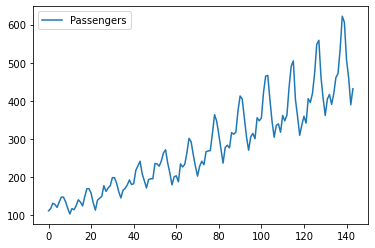

In [9]:
#We can plot the data easily in Pandas by calling the plot() function on the DataFrame.
import matplotlib.pyplot as plt
data.plot()
plt.show()

In [10]:
import datetime

In [13]:
data['Month']=pd.to_datetime(data['Month'], format='%Y-%m')

In [14]:
data.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [15]:
data.shape

(144, 2)

#### Forecast airline passengers traffic flow With Prophet

In [16]:
#import datetime conversion
from pandas import to_datetime
#prepare expected column names
data.columns = ['ds', 'y']
data['ds']= to_datetime(data['ds'])

In [17]:
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


AttributeError: 'list' object has no attribute 'head'

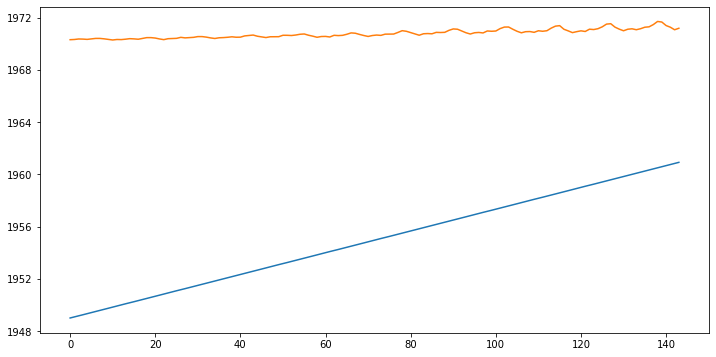

In [25]:
#visualizing the ds column
#configure the figure size
plt.figure(figsize=(12,6))
plt.plot(data).head()(data.set_index(['ds']))

#### Model Building

In [26]:
#fit prophet model on the dataset

#import Prophet library from fbprophet
from fbprophet import Prophet
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)
# define the model
model = Prophet( )
# fit the model
model.fit(data)

#### Prediction

In [27]:
future_prediction = model.make_future_dataframe(periods=365,freq="D")
future_prediction.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


#### Obtaining the forecastes

In [28]:
forecast=model.predict(future_prediction)

In [29]:
forecastforecast=model.predict(future_prediction).head()

#### summarize the forecast

In [30]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 1949-01-01   84.378677   56.432909  113.516658
1 1949-02-01   77.786826   47.113401  106.756384
2 1949-03-01  109.994541   80.811012  140.128475
3 1949-04-01  107.446903   76.325126  134.587352
4 1949-05-01  110.934953   83.125630  140.653579


#### plot forecast

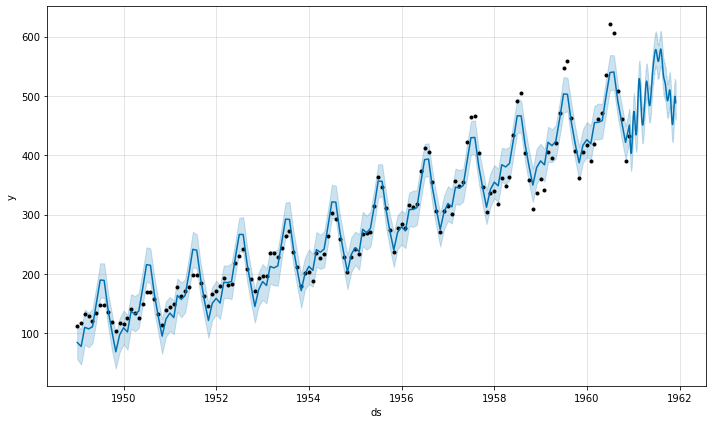

In [31]:
model.plot(forecast)
plt.show()

#### plotting the forecast components

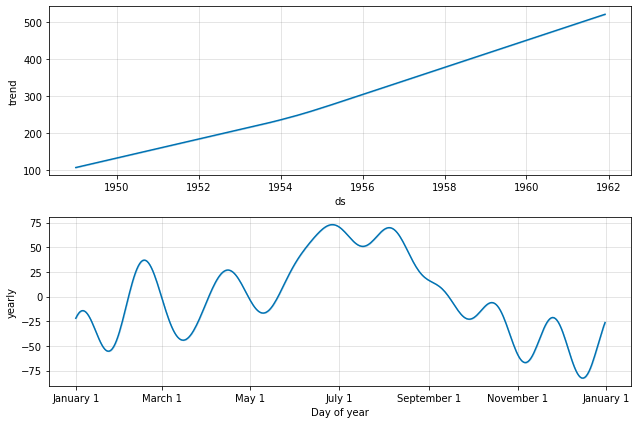

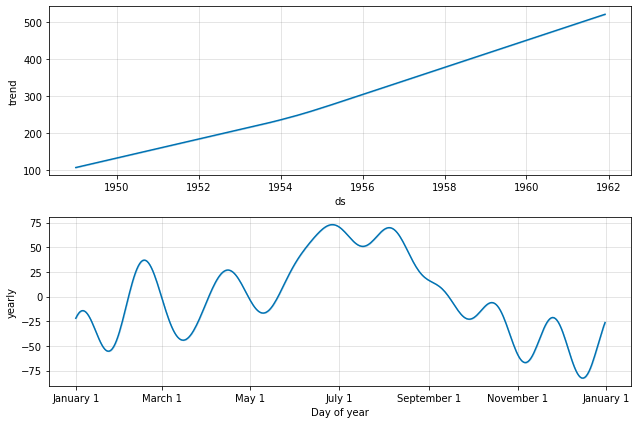

In [32]:
model.plot_components(forecast)

#### Cross Validation

In [33]:
from fbprophet.diagnostics import cross_validation

In [34]:
cv = cross_validation(model,initial = '530 days',period='180 days',horizon = '365 days')
cv

  0%|          | 0/20 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1950-08-01,139.839784,139.787072,139.884309,170,1950-07-22
1,1950-09-01,159.165459,158.981011,159.353248,158,1950-07-22
2,1950-10-01,144.442711,144.099007,144.807490,133,1950-07-22
3,1950-11-01,77.628694,77.075057,78.195676,114,1950-07-22
4,1950-12-01,158.918801,158.192027,159.712191,140,1950-07-22
...,...,...,...,...,...,...
235,1960-08-01,527.079522,502.262160,553.278660,606,1959-12-02
236,1960-09-01,485.869209,459.138670,510.990973,508,1959-12-02
237,1960-10-01,452.202363,424.334430,477.668863,461,1959-12-02
238,1960-11-01,422.372655,396.341696,446.234867,390,1959-12-02


#### Evaluation of Model

In [35]:
from fbprophet.diagnostics import performance_metrics
pm=performance_metrics(cv)
pm.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,1033.442083,32.147194,25.009051,0.079593,0.073811,0.208333
1,42 days,966.621945,31.090544,24.495749,0.078513,0.073811,0.166667
2,46 days,989.559780,31.457269,25.324207,0.079409,0.084098,0.125000
3,47 days,959.568402,30.976901,25.065133,0.078142,0.084098,0.125000
4,48 days,957.810331,30.948511,24.867530,0.076697,0.084098,0.166667


#### Visualizing the performance Metrics

C:\Users\Yashwanth\anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Yashwanth\anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


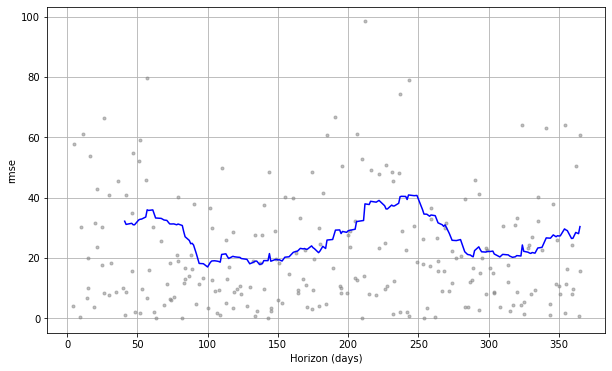

In [36]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv,metric='rmse')

#### Save the Model

In [37]:
#import pickle
import pickle
pickle.dump(model,open('AirPassengers.pkl','wb'))